# Problema 1: Criando funções geométricas básicas.

1. Criar uma função que receba dois parametros (x_coord, y_coord) e retorne um ponto geométrico.

In [38]:
from shapely.geometry import Point, LineString, Polygon

# Criando função
def cria_pontos(x_coord, y_coord):
    """ Função para criar pontos, recebe coordenada x e coordenada y """
    return Point(x_coord, y_coord)


In [39]:
ponto1 = cria_pontos(0.0, 1.1)

In [40]:
print(ponto1)

POINT (0 1.1)


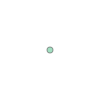

In [41]:
ponto1

In [42]:
print(ponto1.geom_type)

Point


2. Criar uma função chamada cria_linha_geom() que receba uma lista de pontos como parâmetro e retorne um objeto LineString. Além disso, faça as seguintes verificações:

*   Dentro da função, verifique se a função recebeu um objeto list, se for passado algum outro objeto que não seja uma lista, retorne a mensagem de erro: "A entrada deve ser uma lista".
*   Verifique se a lista contém no mínimo dois valores, se não, retorne uma mensagem de erro: "Objeto LineString deve conter pelo menos dois pontos!".
*   Por último, verifique se o objeto de entrada é um objeto Point, se não, retorne a mensagem de erro: "Todos os valores da lista devem ser objetos geométricos Point".



In [43]:
# Criando função de linhas
def cria_linha_geom(pontos):
    """
    Função para criar linhas
    """
    # verificando se o objeto é uma lista
    assert type(pontos) is list, "O objeto de entrada deve ser uma lista."
    
    # verificando a quantidade de itens da lista
    assert len(pontos) >= 2, "O objeto LineString deve conter pelo menos dois pontos."

    # verificando se todos os objetos dentro da lista são pontos
    # a função insistance() retorna True se todos os itens dentro da lista forem
    # do tipo especificado (Point)
    # a função all() retorna True se todos os itens iteraveis retornarem True. 
    assert all(isinstance(p, Point) for p in pontos), "Todos os objetos dentro da lista devem ser pontos."

    return LineString(pontos)


In [44]:
ponto_1 = Point(45.2, 22.34)
ponto_2 = Point(100.22, -3.20)

# Criando lista com pontos
linha = [ponto_1, ponto_2]

# Chamando função para criação de linhas
linha1 = cria_linha_geom(linha)

#print(len(linha))
#type(linha)

In [45]:
print(linha1)

LINESTRING (45.2 22.34, 100.22 -3.2)


In [46]:
print(linha1.geom_type)

LineString


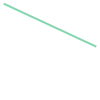

In [47]:
linha1

In [48]:
# Verificando se o parâmetro é do tipo list, para isso vamos passar um objeto do
# tipo Point, o que nos retorna a mensagem de erro.
try:
    # Pass something else than a list
    cria_linha_geom(linha)
except AssertionError:
    print("List check works")
except Exception as e:
    raise e

3. Criar uma função chamada cria_poligonos_geom() que receba uma parâmetro chamado coords e contenha uma lista de coordenadas.
Essa função deve retornar um objeto Polygon baseado nas coordenadas passadas.

* Dentro da função, verifique se o parâmetro passado é do tipo list, se não, retorne a mensagem de erro: "O parâmetro deve ser do tipo list."
* Verifique se a lista passada por parâmetros possuí ao menos 3 itens, se não, retorne a mensagem de erro: "Objetos poligonos devem ter ao menos 3 pontos."
* Verifique se os objetos passados por parâmetros são do tipo tuples, se não, retorne a mensagem de erro: "Todos os valores da lista de coordenadas devem ser tuplas."


In [49]:
def cria_poligonos_geom(coords):
    """
    Função para criar poligonos
    """
    # Verificando se o parâmetro é do tipo list.
    assert (type(coords) is list), "O parâmetro deve ser do tipo list."
    
    # Verificando o a quantidade de itens dentro da lista
    assert (len(coords) >= 3), "Objetos Polygon deve conter pelo menos 3 pontos."

    # Verificando se os objetos no parâmetro são tuplas
    assert all(isinstance(c, tuple) for c in coords), "Todos os valores da lista de coordenadas devem ser tuplas."

    # Criando o polígono
    return Polygon(coords)

In [50]:
poligono = cria_poligonos_geom([(45.2, 22.34), (100.22, -3.20), (70.0, 10.20)])

In [51]:
print(poligono)

POLYGON ((45.2 22.34, 100.22 -3.2, 70 10.2, 45.2 22.34))


In [52]:
print(poligono.geom_type)

Polygon


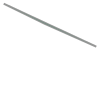

In [53]:
# Mostrando o polígono
poligono

In [54]:
# Verificando se a função atende aos requisitos
try:
    # Pass something else than a list
    cria_poligonos_geom("Give me a polygon")
except AssertionError:
    print("List check works")
except Exception as e:
    raise e

List check works


# Problema 2: Atributos de geometrias

1. Crie uma função chamada pega_centroid() que receba um parâmetro chamado geom. Essa função deve receber qualquer objeto geométrico do tipo Shapely como entrada, e retornar o centroid dessa geometria. Além disso, verifique:
* Se o objeto passado por parâmetro é do tipo, Point, LineString ou Polygon, se não, retorne a mensagem de erro: "A entrada deve ser uma geometria Shapely".

In [55]:
# Criando a função
def devolve_centroid(geom):
    """
    Função para devolver a coordenada de centroid do objeto geométrico
    """

    # Verificando o tipo de dados do parâmetro
    assert type(geom) in [Point, LineString, Polygon], "A entrada deve ser uma geometria Shapely"

    # retornando o centroid
    return geom.centroid

In [56]:
centroid = devolve_centroid(ponto1)
print(centroid)

POINT (0 1.1)


In [57]:
try:
    # Pass something else than a Shapely geometry
    devolve_centroid("Give me a centroid!")
except AssertionError:
    print("Geometry -check works")
except Exception as e:
    raise e

Geometry -check works


2. Crie uma função chamada devolve_area() com um parâmetro chamado polygon. Essa função deve receber um objeto Shapely do tipo Polygon como entrada e retornar a área da geometria.

* Dentro da função, verifique se o objeto de entrada é do tipo Polygon, se alguma coisa que não seja uma lista for passada por parâmetro, retorne a mensagem de erro: "A entrada deve ser um objeto Shapely do tipo Polygon".

In [58]:
# Criando a função
def devolve_area(poligono):
    """
    Função que devolve a área de um poligono
    """

    # Verificando se o parâmetro é do tipo Polygon
    assert type(poligono) in [Polygon], "A entrada deve ser uma geometria Shapely do tipo Polygon"

    # Retornando a área do poligono.
    return poligono.area

In [59]:
area = devolve_area(poligono)
print(round(area, 2))

17.28


In [60]:
try:
    # Pass something else than a Shapely geometry
    devolve_area("Give me an area!")
except AssertionError:
    print("Geometry -check works")
except Exception as e:
    raise e

Geometry -check works


3. Crie uma função chamada devolve_comprimento() que receba um parâmetro chamado geom. Essa função deve aceitar objetos Shapely LineString ou Polygon. A função deve checar o tipo da entrada e retornar o comprimento se for um objeto LineString ou o comprimento do anel exterir se a entrada for um objeto Polygon. Se qualquer outro tipo de parâmetro for passada para a função, retorne a mensagem de erro: "Parâmetro 'geom' deve ser um objeto do tipo LineString ou Polygon.".

In [61]:
# Criando a função
def devolve_comprimento(geom):
    """
    Função que devolve o comprimento do objeto geométrico
    """
    # Verificando se o parâmetro é linha ou polígono
    assert (type(geom) in [LineString, Polygon]), "Parâmetro 'geom' deve ser um objeto do tipo LineString ou Polygon."

    # Retornando o comprimento
    return geom.length

In [62]:
comprimento_linha = devolve_comprimento(linha1)
print("Comprimento da linha:", round(comprimento_linha, 2))

Comprimento da linha: 60.66


In [63]:
comprimento_externo_poligono = devolve_comprimento(poligono)
print("Comprimento externo do poligono:", round(comprimento_externo_poligono, 2))

Comprimento externo do poligono: 121.33


In [64]:
try:
    # Pass something else than a Shapely LineString or Polygon
    devolve_comprimento(Point(1,2))
except AssertionError:
    print("Geometry -check works")
except Exception as e:
    raise e

Geometry -check works
